# 오늘 실습 새로 할거예요.
## colab 하나 만들어서 얼굴 이미지 업로드 해놓기
## 아래 코드 따라 해놓기


In [ ]:
# prompt: 파일 업로드 가장 짧은 예제

from google.colab import files
uploaded = files.upload()


Saving tk1.jpg to tk1.jpg
Saving tk2.jpg to tk2.jpg
Saving tk3.jpg to tk3.jpg
Saving tk4.jpg to tk4.jpg
Saving tk5.jpg to tk5.jpg
Saving tk6.jpg to tk6.jpg
Saving tk7.jpg to tk7.jpg


In [ ]:
!pip install -qq deepface
!pip install -qq ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━

In [ ]:
import tensorflow_datasets as tfds
ds, ds_info = tfds.load("lfw", split="train", with_info=True)
print(ds_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/lfw/incomplete.TZW7EO_0.1.1/lfw-train.tfrecord*...:   0%|          | 0/132…

Dataset lfw downloaded and prepared to /root/tensorflow_datasets/lfw/0.1.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='lfw',
    full_name='lfw/0.1.1',
    description="""
    Labeled Faces in the Wild: A Database for Studying Face Recognition in
    Unconstrained Environments
    """,
    homepage='http://vis-www.cs.umass.edu/lfw',
    data_dir='/root/tensorflow_datasets/lfw/0.1.1',
    file_format=tfrecord,
    download_size=172.20 MiB,
    dataset_size=180.28 MiB,
    features=FeaturesDict({
        'image': Image(shape=(250, 250, 3), dtype=uint8),
        'label': Text(shape=(), dtype=string),
    }),
    supervised_keys=('label', 'image'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=13233, num_shards=2>,
    },
    citation="""@TechReport{LFWTech,
        author = {Gary B. Huang and Manu Ramesh and Tamara Berg and Erik Learned-Miller},
        title = {Labeled Faces in the Wild: A

In [ ]:
!pip list | grep -E 'numpy|opencv-python|deepface|ultralytics'

deepface                           0.0.93
numpy                              2.0.2
opencv-python                      4.11.0.86
opencv-python-headless             4.11.0.86
ultralytics                        8.3.103
ultralytics-thop                   2.0.14


In [ ]:
!python -V

Python 3.11.11


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from deepface import DeepFace

In [ ]:
import numpy as np
import cv2
from deepface import DeepFace
from deepface.modules import preprocessing
from tqdm import tqdm

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
!ls -alh /root/.deepface

total 16K
drwxr-xr-x 3 root root 4.0K Apr  7 05:14 .
drwx------ 1 root root 4.0K Apr  7 05:14 ..
drwxr-xr-x 2 root root 4.0K Apr  7 05:18 weights


In [ ]:
tf.__version__

'2.18.0'

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

[]


In [ ]:
!ls

sample_data  tk1.jpg  tk2.jpg  tk3.jpg	tk4.jpg  tk5.jpg  tk6.jpg  tk7.jpg


In [ ]:
%%time
# detector
detected_face = DeepFace.extract_faces('tk1.jpg', detector_backend="opencv")

CPU times: user 2.12 s, sys: 176 µs, total: 2.12 s
Wall time: 2.15 s


In [ ]:
print(type(detected_face))
print(len(detected_face))
print(type(detected_face[0]))
print(detected_face[0].keys())

print(detected_face[0]['face'].shape)
print(detected_face[0]['facial_area'])
print(detected_face[0]['confidence'])

<class 'list'>
1
<class 'dict'>
dict_keys(['face', 'facial_area', 'confidence'])
(330, 330, 3)
{'x': 611, 'y': 167, 'w': 330, 'h': 330, 'left_eye': (827, 293), 'right_eye': (690, 291)}
0.92


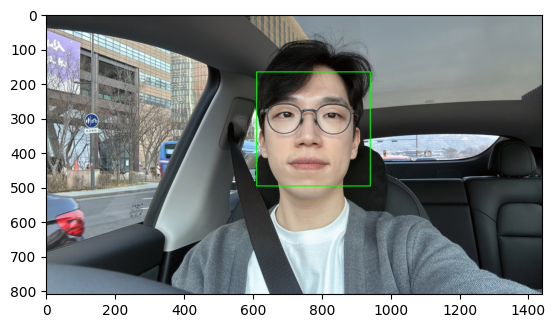

In [ ]:
img = cv2.imread('tk1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for face in detected_face:
    x, y, w, h = face['facial_area']['x'], face['facial_area']['y'], face['facial_area']['w'], face['facial_area']['h']
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(img)

In [ ]:
%%time
# detector
detected_face = DeepFace.extract_faces('tk1.jpg', detector_backend="mtcnn")

CPU times: user 4.15 s, sys: 2.7 s, total: 6.85 s
Wall time: 5.34 s


In [ ]:
%%time
# detector

img = cv2.imread('tk1.jpg')

detected_face_yolo = DeepFace.extract_faces('tk1.jpg', detector_backend="yolov8")

CPU times: user 1.08 s, sys: 0 ns, total: 1.08 s
Wall time: 1.11 s


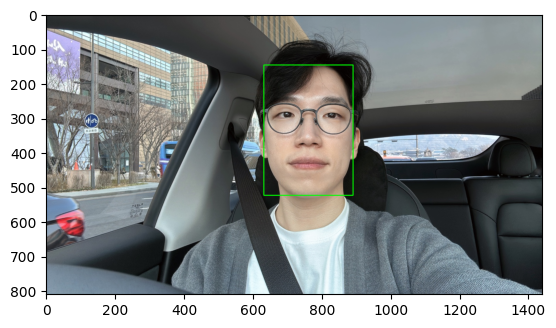

In [ ]:
img = cv2.imread('tk1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for face in detected_face_yolo:
    x, y, w, h = face['facial_area']['x'], face['facial_area']['y'], face['facial_area']['w'], face['facial_area']['h']
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(img)

In [ ]:
print(detected_face[0]['facial_area'])
print(detected_face_yolo[0]['facial_area'])

{'x': 611, 'y': 167, 'w': 330, 'h': 330, 'left_eye': (827, 293), 'right_eye': (690, 291)}
{'x': 632, 'y': 147, 'w': 259, 'h': 377, 'left_eye': (827, 293), 'right_eye': (698, 299)}


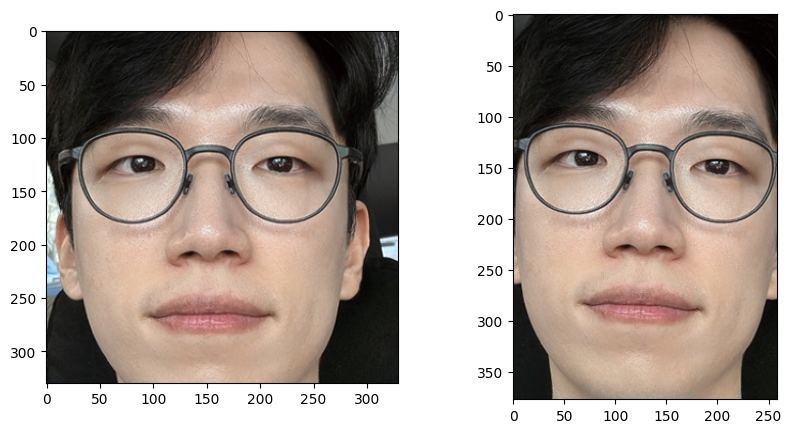

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(detected_face[0]['face'])
axs[1].imshow(detected_face_yolo[0]['face'])

plt.show()

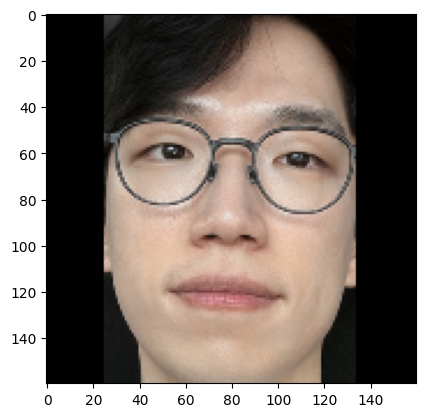

In [ ]:
preprocessed_face = preprocessing.resize_image(
    img=detected_face_yolo[0]['face'], target_size=(160, 160))
preprocessed_face = preprocessing.normalize_input(
    img=preprocessed_face, normalization='base')

plt.imshow(preprocessed_face[0])

In [ ]:
%%time
embedding = DeepFace.represent(
    preprocessed_face[0], model_name="Facenet",
    enforce_detection=False, normalization='raw')

CPU times: user 782 ms, sys: 16.7 ms, total: 799 ms
Wall time: 739 ms


In [ ]:
print(embedding[0].keys())
print(len(embedding[0]['embedding']))
print(np.array(embedding[0]['embedding']))

dict_keys(['embedding', 'facial_area', 'face_confidence'])
128
[    0.19473     -1.2263     -1.5598   -0.054789     0.59329    -0.82606    -0.03866    -0.28733    0.076453    -0.21412     0.15654    -0.13429    -0.19075     -1.9315    -0.10033     0.55771   -0.036962    -0.26313     0.34558    -0.90026    -0.00452    -0.17161     -1.4154   -0.062421    -0.20669     0.57833
     0.60715      1.1732     0.11454     0.32387     0.47034      2.1528     0.22534     -1.7519    0.022507    -0.29995    -0.93392     0.52064       1.271    -0.19761     0.16154      1.2868    -0.25193     -1.4423    -0.10462     0.24138     0.21397     0.19636    -0.81342      1.3136    -0.61755     0.68024
     0.54699     0.43837     0.86184     0.96746    -0.65588   -0.021584     0.41386    -0.89953    -0.44324     -1.1819     0.17213      1.1136     0.70089      1.2984     0.93943     0.63106     0.41856    -0.43335    -0.19679    -0.78359    -0.37528    0.070057    -0.62264    0.065199     -1.1533      1.153

In [ ]:
%%time
embedding1 = DeepFace.represent(
    'tk1.jpg', model_name="Facenet", detector_backend="yolov8",
    enforce_detection=True, normalization='base')

CPU times: user 1.41 s, sys: 23 ms, total: 1.44 s
Wall time: 1.35 s


In [ ]:
print(np.array(embedding1[0]['embedding']))

[    0.20546     -1.1875     -1.6663    -0.20738     0.65773     -0.7862  0.00011417    -0.24243     0.12932    -0.21154    0.049277    -0.19957    -0.28931     -1.8907   -0.039435     0.60041   -0.017538    -0.35889     0.36815     -1.0264  -0.0092803    -0.14947     -1.3206   -0.008745    -0.12576      0.6223
     0.62403      1.1927     0.16172     0.41447     0.41687      2.0746     0.30604      -1.801     0.13782    -0.15726     -1.1107     0.59061      1.3555   -0.078186    0.065565      1.2776    -0.27474     -1.6414     0.11416     0.20825     0.17097     0.18694    -0.97302      1.2175    -0.81848     0.81985
     0.53925     0.41944      0.6195      1.0082    -0.52702   -0.022177     0.42977     -0.8743    -0.34847     -1.1986     0.11984      1.0815     0.67263      1.2396      1.1137     0.72142      0.4767    -0.48177    -0.12537    -0.70767    -0.39182   -0.010838    -0.51652    0.017558     -1.0116       1.091
     -1.2745    -0.76064    -0.36928    -0.60145    -0.47138 

In [ ]:
emb = np.array(embedding[0]['embedding'])  # yolo detector 를 사용해서 직접 뽑은 embedding
emb1 = np.array(embedding1[0]['embedding'])  # file 에서 deepface 자동으로 뽑아준 embedding

print(np.linalg.norm(emb))  # emb 의 벡터 크기 (L2 norm)
print(np.linalg.norm(emb1))

# L2 distance -> 거리
print(np.linalg.norm(emb - emb1))

# cos similarity -> 각도
emb_norm = emb / np.linalg.norm(emb)  # normalization: vector 의 크기를 1로 만듬
print(np.linalg.norm(emb_norm))  # = 1
emb1_norm = emb1 / np.linalg.norm(emb1)
print(np.dot(emb_norm, emb1_norm))


9.136551256675034
9.200162087470146
1.0389178759739455
1.0
0.9936037784530616


0.9190637820179471
4.07211816393455


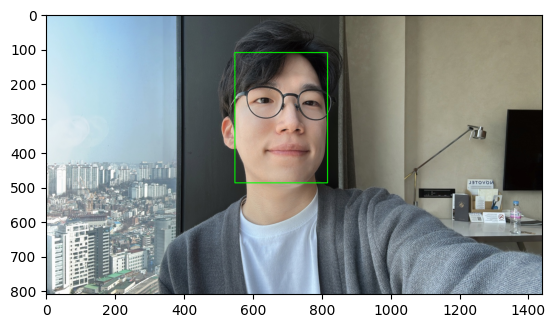

In [ ]:
# tk1.jpg, tk2.jpg

detected_face2 = DeepFace.extract_faces('tk2.jpg', detector_backend="yolov8")

preprocessed_face2 = preprocessing.resize_image(
    img=detected_face2[0]['face'], target_size=(160, 160))
preprocessed_face2 = preprocessing.normalize_input(
    img=preprocessed_face2, normalization='base')

embedding2 = DeepFace.represent(
    preprocessed_face2[0], model_name="Facenet",
    enforce_detection=False, normalization='raw')

emb2 = np.array(embedding2[0]['embedding'])
emb2_norm = emb2 / np.linalg.norm(emb2)

print(emb_norm @ emb2_norm)
print(np.linalg.norm(emb - emb2))

img2 = cv2.imread('tk2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

x, y, w, h = detected_face2[0]['facial_area']['x'], detected_face2[0]['facial_area']['y'], detected_face2[0]['facial_area']['w'], detected_face2[0]['facial_area']['h']
img_show2 = cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(img_show2)

In [ ]:
ds, ds_info = tfds.load("lfw", split="train", with_info=True)
print(ds_info)

tfds.core.DatasetInfo(
    name='lfw',
    full_name='lfw/0.1.1',
    description="""
    Labeled Faces in the Wild: A Database for Studying Face Recognition in
    Unconstrained Environments
    """,
    homepage='http://vis-www.cs.umass.edu/lfw',
    data_dir='/root/tensorflow_datasets/lfw/0.1.1',
    file_format=tfrecord,
    download_size=172.20 MiB,
    dataset_size=180.28 MiB,
    features=FeaturesDict({
        'image': Image(shape=(250, 250, 3), dtype=uint8),
        'label': Text(shape=(), dtype=string),
    }),
    supervised_keys=('label', 'image'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=13233, num_shards=2>,
    },
    citation="""@TechReport{LFWTech,
        author = {Gary B. Huang and Manu Ramesh and Tamara Berg and Erik Learned-Miller},
        title = {Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments},
        institution = {University of Massac

In [ ]:
all_images = []
all_names = []

for example in tqdm(tfds.as_numpy(ds)):
    all_images.append(example['image'])  # (250, 250, 3)
    all_names.append(example['label'].decode())  # text -> byte --> text


100%|██████████| 13233/13233 [00:14<00:00, 919.70it/s] 


In [ ]:
all_images = np.array(all_images)
all_names = np.array(all_names)

print(all_images.shape)  # 4D tensor
print(all_names.shape)

(13233, 250, 250, 3)
(13233,)


In [ ]:
len(np.unique(all_names))  # 5749

5749

12384 Mia_Mottley


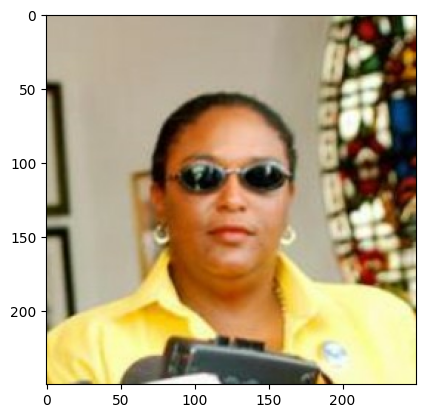

In [ ]:
rand_idx = np.random.randint(0, len(all_images))
print(rand_idx, all_names[rand_idx])
plt.imshow(all_images[rand_idx])

4640
0.5538145840366024
8.119863226564817


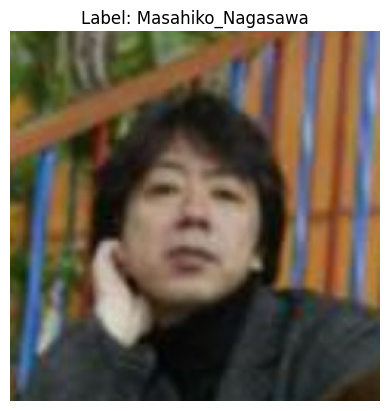

In [ ]:
rand_idx = np.random.randint(0, len(all_images))

print(rand_idx)

image = all_images[rand_idx]
name = all_names[rand_idx]

embedding_lfw = DeepFace.represent(
    image, model_name="Facenet",
    detector_backend="yolov8",
    enforce_detection=True)

emb_lfw = np.array(embedding_lfw[0]['embedding'])
emb_lfw_norm = emb_lfw / np.linalg.norm(emb_lfw)

print(emb_norm @ emb_lfw_norm)
print(np.linalg.norm(emb - emb_lfw))

plt.imshow(image)
plt.title(f"Label: {name}")
plt.axis("off")
plt.show()